<a href="https://colab.research.google.com/github/divakarkumar424/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


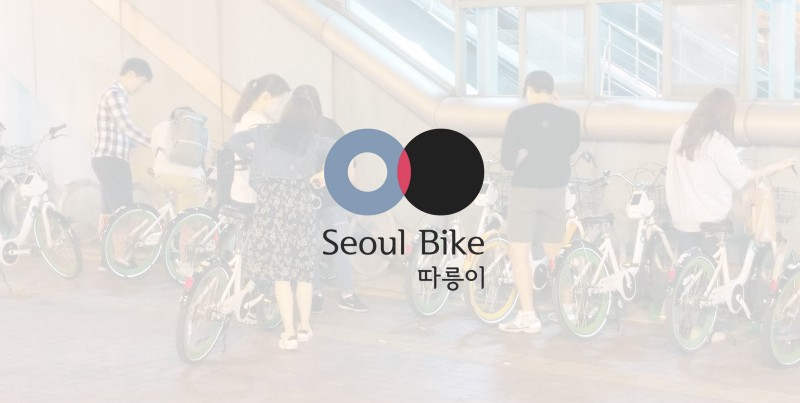

### <b> Data Description </b>

##### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


#### <b>Attribute Information: </b>

* ##### Date : year-month-day
* ##### Rented Bike count - Count of bikes rented at each hour
* ##### Hour - Hour of he day
* ##### Temperature-Temperature in Celsius
* ##### Humidity - %
* ##### Windspeed - m/s
* ##### Visibility - 10m
* ##### Dew point temperature - Celsius
* ##### Solar radiation - MJ/m2
* ##### Rainfall - mm
* ##### Snowfall - cm
* ##### Seasons - Winter, Spring, Summer, Autumn
* ##### Holiday - Holiday/No holiday
* ##### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### **Importing the libraries**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

### **Mount drive**

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing dataset**

Since data is in form of excel file we have to use pandas read_excel to load the data

After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row

Check whether any null values are there or not. if it is present then following can be done,

A. Imputing data using Imputation method in sklearn B.Filling NaN values with mean, median and mode using fillna() method

Describe data --> which can give statistical analysis.

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks'

In [4]:
file = '/content/drive/MyDrive/Datasets/SeoulBikeData.csv'

In [5]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(200000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

### **Prepare Data and EDA**

### **Reading dataset**

In [6]:
#check dataset
SeoulBike_df = pd.read_csv(file,encoding='ISO-8859-1')
SeoulBike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
SeoulBike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
print('The DataFrame contains {} lines and {} columns because in a day we have 24 hours and we have 365 days a year so 365*24 = 8760, which represents the number of lines'.format(SeoulBike_df.shape[0],SeoulBike_df.shape[1]))

The DataFrame contains 8760 lines and 14 columns because in a day we have 24 hours and we have 365 days a year so 365*24 = 8760, which represents the number of lines


### **Checking data dimension**

In [9]:
print('Dimension of Data:', SeoulBike_df.shape)

Dimension of Data: (8760, 14)


In [10]:
SeoulBike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# datatype info
SeoulBike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [12]:
SeoulBike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

no missing values -->> no need to dropna or impute

In [13]:
# duplicate
len(SeoulBike_df[SeoulBike_df.duplicated()])

0

In [14]:
print(SeoulBike_df.apply(lambda col: col.unique()))

Date                         [01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...
Rented Bike Count            [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...
Hour                         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Temperature(°C)              [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....
Humidity(%)                  [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...
Wind speed (m/s)             [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...
Visibility (10m)             [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...
Dew point temperature(°C)    [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...
Solar Radiation (MJ/m2)      [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...
Rainfall(mm)                 [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...
Snowfall (cm)                [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...
Seasons                                       [Winter, Spring, Summer, Autumn]
Holiday                                             

In [15]:
# Identifying the unique number of values in the dataset
SeoulBike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

Visualizing the null values

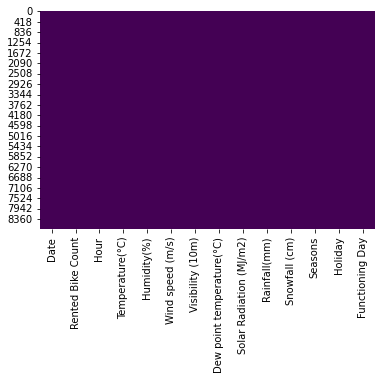

In [16]:
sns.heatmap(SeoulBike_df.isnull(),cbar=False,cmap='viridis')

In [17]:
# Viewing the data statistics
SeoulBike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### **How many Total Seasons and Holidays**

In [18]:
SeoulBike_df.Seasons.value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


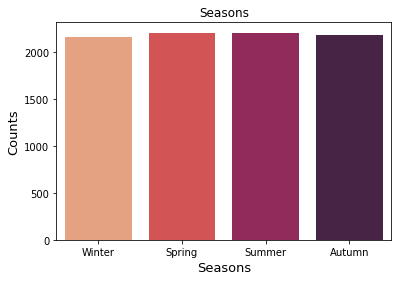

In [19]:
sns.countplot('Seasons', data=SeoulBike_df,palette='rocket_r')
plt.title('Seasons')
plt.xlabel('Seasons',fontsize = 13)
plt.ylabel('Counts',fontsize = 13)
plt.show()

### **Average Users Count By Hour Of The Day Across Season**

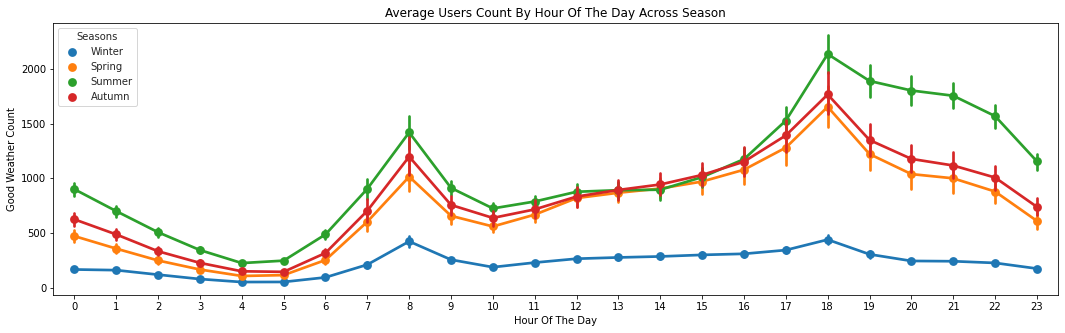

In [20]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.set_style("whitegrid")
sns.pointplot(x=SeoulBike_df["Hour"], y=SeoulBike_df["Rented Bike Count"], hue=SeoulBike_df["Seasons"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Good Weather Count', title="Average Users Count By Hour Of The Day Across Season");

In [21]:
SeoulBike_df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


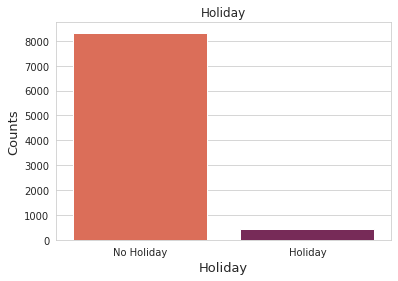

In [22]:
sns.countplot('Holiday', data=SeoulBike_df,palette='rocket_r')
plt.title('Holiday')
plt.xlabel('Holiday',fontsize = 13)
plt.ylabel('Counts',fontsize = 13)
plt.show()

### **Count of bikes during Holiday and No Holiday**

[Text(0.5, 1.0, 'Count of bikes during Holiday and No Holiday')]

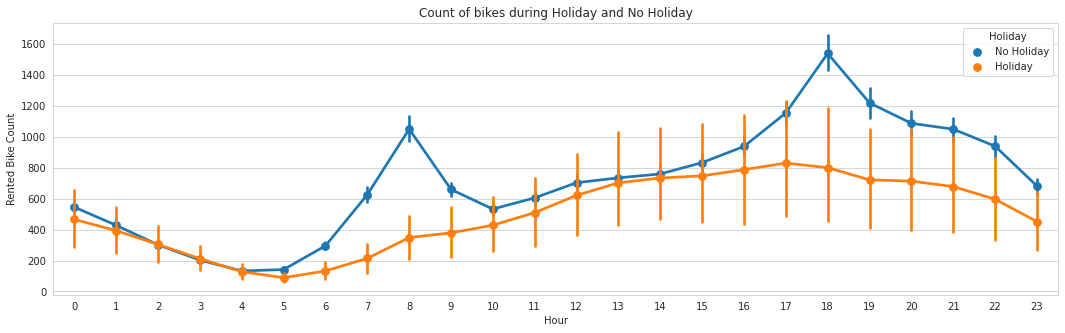

In [23]:
fig, ax = plt.subplots(figsize=(18,5))
sns.pointplot(data=SeoulBike_df, x='Hour', y='Rented Bike Count', hue='Holiday', ax=ax)
ax.set(title='Count of bikes during Holiday and No Holiday')

In [24]:
SeoulBike_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


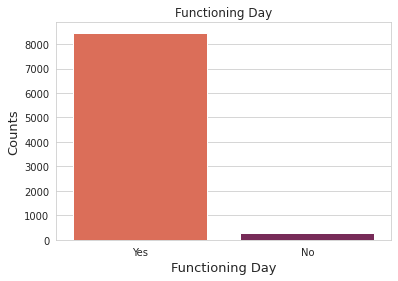

In [25]:
sns.countplot('Functioning Day', data=SeoulBike_df,palette='rocket_r')
plt.title('Functioning Day')
plt.xlabel('Functioning Day',fontsize = 13)
plt.ylabel('Counts',fontsize = 13)
plt.show()

### **Count of bikes during Functioning Day**

[Text(0.5, 1.0, 'Count of bikes during Functioning Day')]

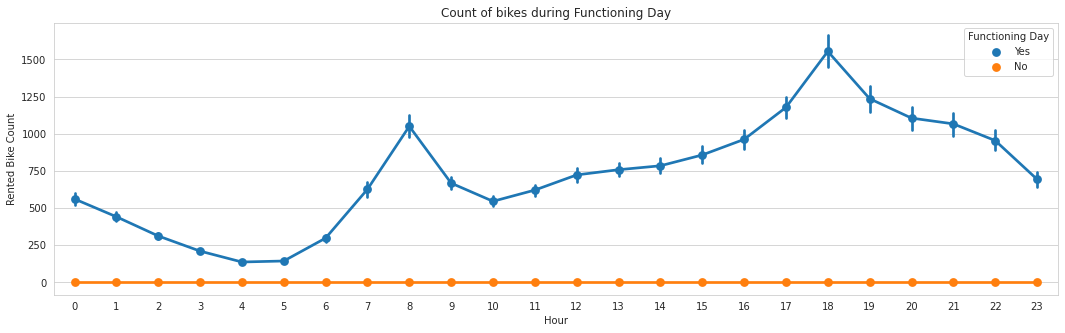

In [26]:
fig, ax = plt.subplots(figsize=(18,5))
sns.pointplot(data=SeoulBike_df, x='Hour', y='Rented Bike Count', hue='Functioning Day', ax=ax)
ax.set(title='Count of bikes during Functioning Day')

### **Rented Bike in Season and Holiday**

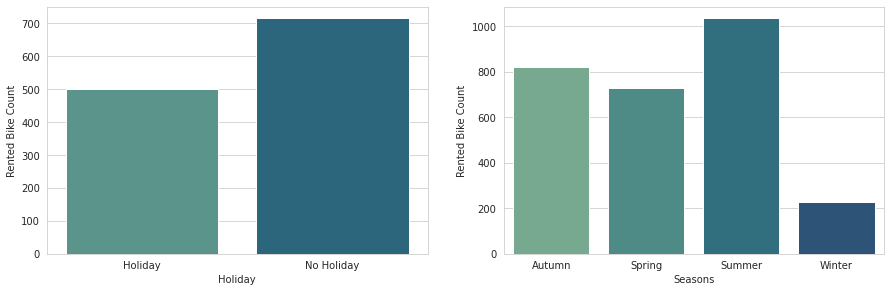

In [27]:
Holiday_rent = pd.DataFrame(SeoulBike_df.groupby('Holiday').agg({'Rented Bike Count':'mean'}))
Season_rent = pd.DataFrame(SeoulBike_df.groupby('Seasons').agg({'Rented Bike Count':'mean'}))

fig, ax = plt.subplots(1,1,figsize=(15,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Holiday_rent.index, y = Holiday_rent['Rented Bike Count'], palette='crest')
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Season_rent.index, y = Season_rent['Rented Bike Count'], palette='crest')

We are given the information of one year which incorporate many climate factors like seasons, mugginess and so on From the above information, we see that the enormous number of bikes are being leased when there is a functioning day/No Holiday and all the more frequently in the late spring season. Indeed, even overall likewise, bikes are being leased more in the functioning day itself paying little heed to the seasons.

**Scatter Plot between Rental Bike Count and Hour of the Day**

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:608: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  scout = ax.scatter(scout_x, scout_y, **kws)


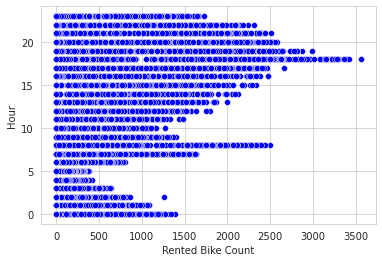

In [28]:
sns.scatterplot(x='Rented Bike Count', y='Hour', data=SeoulBike_df,color = 'B')

**Scatter Plot between Rental Bike Count and Temperature**

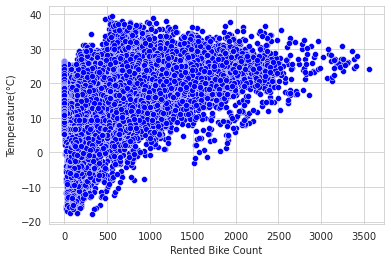

In [29]:
sns.scatterplot(x='Rented Bike Count', y='Temperature(°C)', data=SeoulBike_df , color = 'B')

**Scatter Plot between Rental Bike Count and Humidity**

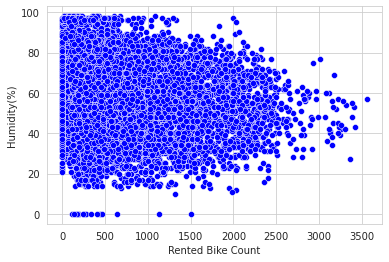

In [30]:
sns.scatterplot(x='Rented Bike Count', y='Humidity(%)', data=SeoulBike_df , color = 'B')

**Scatter Plot between Rental Bike Count and Wind Speed**

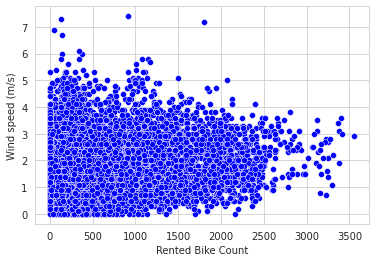

In [31]:
sns.scatterplot(x='Rented Bike Count', y='Wind speed (m/s)', data=SeoulBike_df , color = 'B')

**Scatter Plot between Rental Bike Count and Visibility**

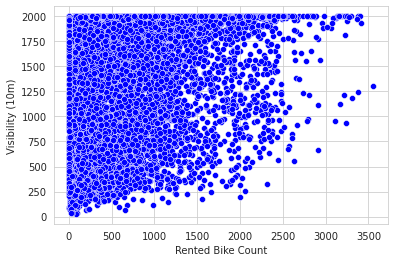

In [32]:
sns.scatterplot(x='Rented Bike Count', y='Visibility (10m)', data=SeoulBike_df , color = 'B')

**Scatter Plot between Rental Bike Count and Dew point temperature**

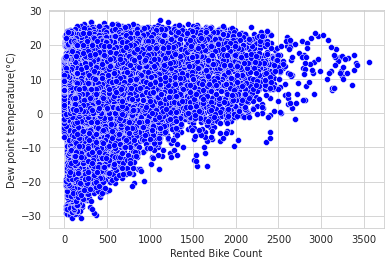

In [33]:
sns.scatterplot(x='Rented Bike Count', y='Dew point temperature(°C)', data=SeoulBike_df , color = 'B')

**Scatter Plot between Rental Bike Count and Solar Radiation**

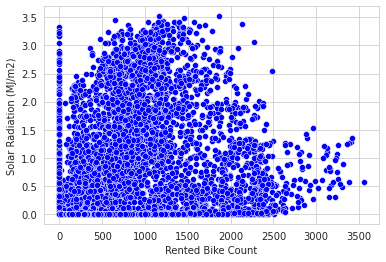

In [34]:
sns.scatterplot(x='Rented Bike Count', y='Solar Radiation (MJ/m2)', data=SeoulBike_df , color = 'B')

**Scatter Plot between Rental Bike Count and Rainfall**

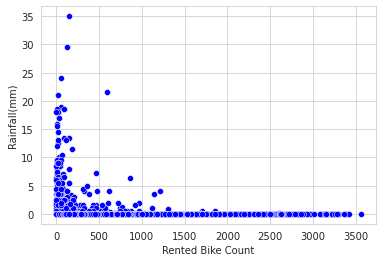

In [35]:
sns.scatterplot(x='Rented Bike Count', y='Rainfall(mm)', data=SeoulBike_df , color = 'B')

**Scatter Plot between Rental Bike Count and Snowfall**

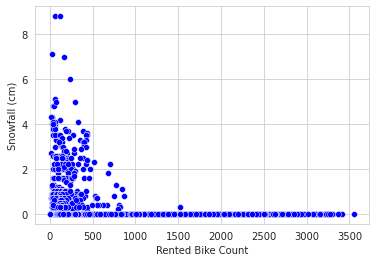

In [36]:
sns.scatterplot(x='Rented Bike Count', y='Snowfall (cm)', data=SeoulBike_df , color = 'B')

**We convert as datetime the series 'Date'**

In [37]:
SeoulBike_df['Date']=pd.to_datetime(SeoulBike_df['Date'])

**Label encoding the data**

In [38]:
#importing sklearn libary
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
SeoulBike_df['Holiday']= le.fit_transform(SeoulBike_df['Holiday']) 
SeoulBike_df['Functioning Day']= le.fit_transform(SeoulBike_df['Functioning Day'])
SeoulBike_df['Seasons']= le.fit_transform(SeoulBike_df['Seasons'])

In [39]:
SeoulBike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [40]:
def hour_jitter(h):
    #return h + ((np.random.randint(low=0, high=9, size=1)[0] - 4) / 10)
    return h + np.random.uniform(-0.4, 0.4)

In [41]:
def hour_format(h):
    return "{:02d}:00 AM".format(h) if h <= 12 else "{:02d}:00 PM".format(h%12)

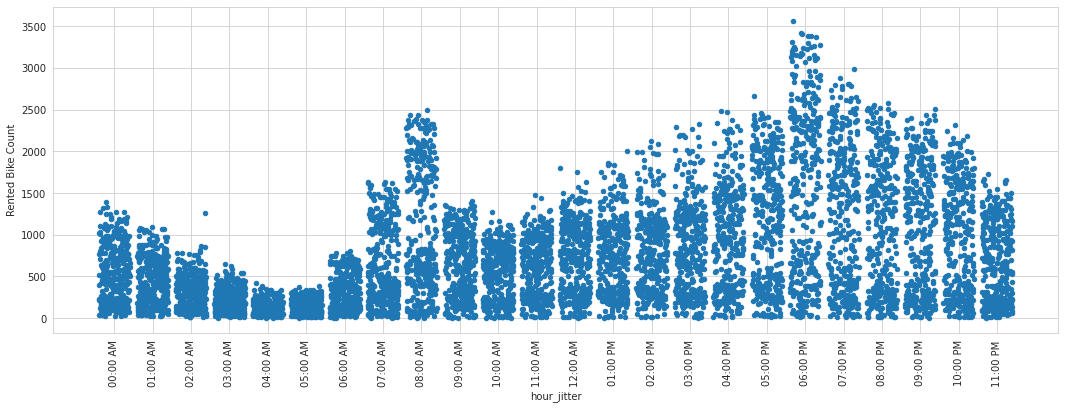

In [42]:
# hour plot
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# color_map = plt.get_cmap("jet")
color_map = mcolors.ListedColormap(list(["#5e4fa2", "#3288bd", "#66c2a5", "#abdda4", "#e6f598", "#fee08b", "#fdae61", "#f46d43", "#d53e4f", "#9e0142"]))
SeoulBike_df['hour_jitter'] = SeoulBike_df['Hour'].map(hour_jitter)
SeoulBike_df[SeoulBike_df['Functioning Day'] == 1].plot(kind="scatter", x='hour_jitter', y='Rented Bike Count',
    figsize=(18,6))


hours = np.unique(SeoulBike_df['Hour'].values)
hour_labels = [hour_format(h) for h in hours]
plt.xticks(hours, hour_labels, rotation='vertical');

In [43]:
#Droping
SeoulBike_df.drop('hour_jitter', axis=1, inplace=True);

### **Here are the correlations between variables**

**we can see that on the target varibale line the most correlated variable to the rent are:**
* Hour
* Temperature
* Dew point temperature
* solar rediation

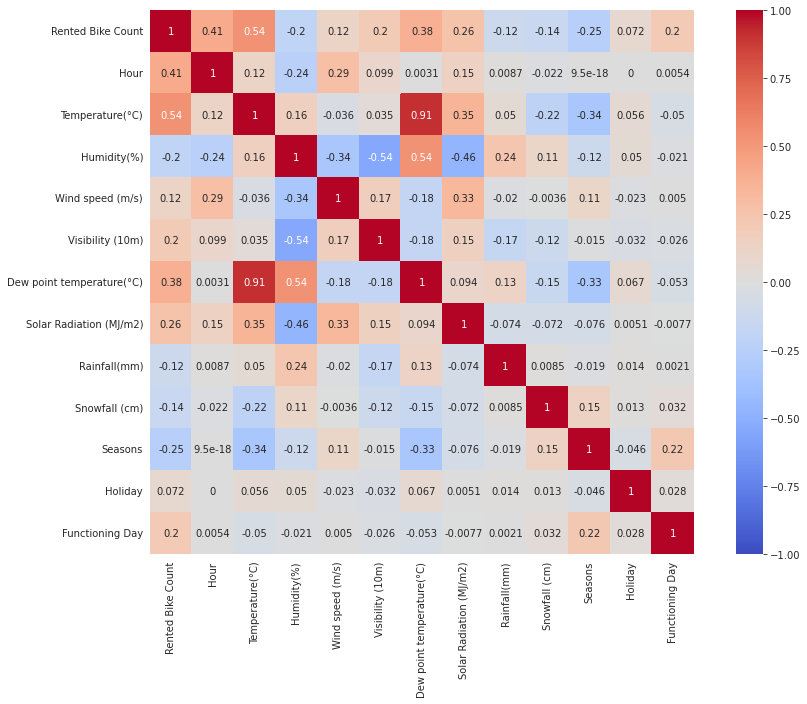

In [44]:
plt.figure(figsize = (15,10))
sns.heatmap(SeoulBike_df.corr("pearson"),vmin = -1, vmax=1,cmap='coolwarm',annot=True,
                              square=True);

**we see that there is a haper correlation between column 'Temperature(°C)' and 'Dew poin temperature(°C)' so we can drop the column 'Dew point tenperature(°C)'. And they have the same variations.**

In [45]:
SeoulBike_df = SeoulBike_df.drop(['Dew point temperature(°C)'], axis=1)

**This in the list of sorted correlation of variables to the target**

In [46]:
SeoulBike_df1Corr=pd.DataFrame(SeoulBike_df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation to the target'])
SeoulBike_df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Solar Radiation (MJ/m2),0.261837
Functioning Day,0.203943
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Holiday,0.072338
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804


**Variable which informs us if it is night or day**

In [47]:
SeoulBike_df['label_day_night']=SeoulBike_df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

**We create a column feature which gives the day of the week and the month corresponding to the date**

In [48]:
SeoulBike_df['WeekDay']=SeoulBike_df["Date"].dt.day_name() 

In [49]:
SeoulBike_df['Month']=SeoulBike_df['Date'].dt.month

## **Plotting variables to the target**

**On this first plot, we see a high raise between april to autumn of bikes rent.**

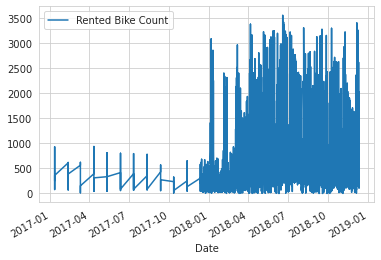

In [50]:
SeoulBike_df.plot(x='Date',y='Rented Bike Count',kind='line')

**Days with highest rented bike are week days**

So we suppose people rent bikes to go to work or school

In [51]:
SeoulBike_dfviz=pd.DataFrame(SeoulBike_df.groupby('WeekDay').sum()['Rented Bike Count'].sort_values(ascending=False))
SeoulBike_dfviz.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
WeekDay,
Thursday,928267
Saturday,911475
Wednesday,908871
Friday,898966
Monday,863563
Tuesday,862877
Sunday,798295


**Let's see the repartition of the rents follonwing the moment of the day**

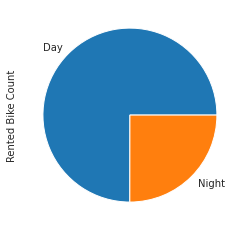

In [52]:
SeoulBike_df.groupby('label_day_night').sum()['Rented Bike Count'].plot.pie()

**According to this boxplot there are much more rents during the day than the night**

As the median for the day is around 600 and the median for the night is around 350

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


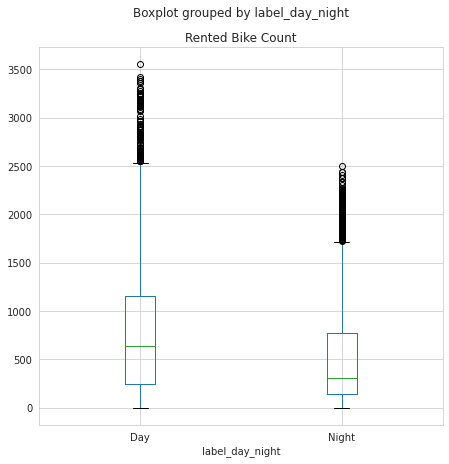

In [53]:
boxplotDay_night= SeoulBike_df.boxplot(['Rented Bike Count'],by='label_day_night',figsize=(7,7))

**We create the variable to encode WeekDay**

In [54]:
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

SeoulBike_df['WeekDayEncoding']=SeoulBike_df['WeekDay'].map(mapping_dictDay)

### **Modeling**

We have to keep in mind that the most correlated features to the target are :

* the hour
* the temperature
* the solar radiation

We have to drop some features that are not important to our target.

***Let's import libraires needed in this modeling part***

In [86]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [56]:
# Splitting the dataset into the Training set and Test set
SeoulBike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month,WeekDayEncoding
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,1,1,Night,Thursday,1,4
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,1,1,Night,Thursday,1,4
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,1,1,Night,Thursday,1,4
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,1,1,Night,Thursday,1,4
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,1,1,Night,Thursday,1,4


In [57]:
SeoulBike_df.shape

(8760, 17)

Let's create an object to report results

In [58]:
reporting={}

In [59]:
X=SeoulBike_df.drop(['Rented Bike Count','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay'],axis =1)
y=SeoulBike_df.iloc[:,1] #the target

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [61]:
print(X_train.shape)

(7008, 10)


In [62]:
print(y_train.shape)

(7008,)


In [63]:
print(X_test.shape)

(1752, 10)


In [64]:
print(y_test.shape)

(1752,)


In [65]:
reg_lr = LinearRegression()
reg_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
reg_lr.coef_

array([ 2.70927418e+01,  3.14225948e+01, -7.35385042e+00,  9.21817764e+00,
        1.59952208e-02, -7.40674024e+01, -5.88839792e+01,  1.27243673e+01,
        9.02664882e+00, -4.09720619e+00])

In [67]:
# Predicting the Test set results
y_pred = reg_lr.predict(X_test)

In [68]:
print("Linear Regression Model Training Score: ", reg_lr.score(X_train, y_train))

Linear Regression Model Training Score:  0.47302106346183564


In [69]:
print("Linear Regression Model Testing Score: ", reg_lr.score(X_test, y_test))

Linear Regression Model Testing Score:  0.47281230488999676


In [70]:
predregrtrain = reg_lr.predict(X_train)
predregrtest = reg_lr.predict(X_test)

*After fitting the model, we print the score between predictions and test targets*

In [71]:
train_set_rmse = (np.sqrt(mean_squared_error(predregrtrain,y_train )))
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {} and the train root mean square is: {}'
     .format(train_set_r2,train_set_rmse))

test_set_rmse = (np.sqrt(mean_squared_error(predregrtest,y_test )))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {} and the test root mean square is: {}'
     .format(test_set_r2,test_set_rmse))

Linear model, R2 train score is : 0.4730210634618356 and the train root mean square is: 466.839856167986
Linear model, R2 test score is : 0.4728123048899967 and the test root mean square is: 473.63236204649144


In [72]:
reporting['Linear regression']=test_set_r2

### **Ridge regression**
What is Ridge regression ? The main idea begin Ridge Regression is to find a new line that doesn't fit the training data. Ridge regression can provide better long term regression. The goal of the regularization parameter alpha is to reduce the variation Ridge regression is interesting when we have only very interesting features on the dataset.

In [73]:
X_RidgeRegression=SeoulBike_df.drop(['Rented Bike Count','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay'],axis =1)
y=SeoulBike_df.iloc[:,1] #the target
X_train,X_test,y_train,y_test=train_test_split(X_RidgeRegression,y,test_size=0.2)

Let's test the values of the Ridge in function of the alpha value The R2 test highest value is 0.47, which is the same result as we had in the Linear Regression

In [74]:
errors=[]
coefs=[]
alphas=[-2000,-1000, 0, 10, 20, 50, 6000, 1000000]
for alpha in alphas:
    linridge = Ridge(alpha = alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    coefs.append(linridge.coef_)
    errors.append(np.mean((linridge.predict(X_test)-y_test)**2))
    print('Alpha = {:.2f}\n \
R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(alpha, r2_train, r2_test))

Alpha = -2000.00
 R2 training: 0.42, R2 test: 0.38

Alpha = -1000.00
 R2 training: 0.47, R2 test: 0.43

Alpha = 0.00
 R2 training: 0.48, R2 test: 0.45

Alpha = 10.00
 R2 training: 0.48, R2 test: 0.45

Alpha = 20.00
 R2 training: 0.48, R2 test: 0.45

Alpha = 50.00
 R2 training: 0.48, R2 test: 0.45

Alpha = 6000.00
 R2 training: 0.47, R2 test: 0.44

Alpha = 1000000.00
 R2 training: 0.33, R2 test: 0.31



Grid Search on Ridge, we find the same result as the previous test

In [75]:
ridge=Ridge()
#parameters={'alpha':[-10000,-6000,-100,-200, 1, 10, 20, 50,100,150,200, 600, 1000000]}
parameters={'alpha':list(range(-300,300))}

gridSearchRidge=GridSearchCV(ridge,parameters,scoring='r2',cv=3)
gridSearchRidge.fit(X_train,y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [-300, -299, -298, -297, -296, -295, -294,
                                   -293, -292, -291, -290, -289, -288, -287,
                                   -286, -285, -284, -283, -282, -281, -280,
                                   -279, -278, -277, -276, -275, -274, -273,
                                   -272, -271, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [76]:
best_ridge=gridSearchRidge.best_estimator_
bestridge_testScore=best_ridge.score(X_test,y_test)


In [77]:
print('The best R2 train score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(gridSearchRidge.best_score_,gridSearchRidge.best_params_['alpha']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestridge_testScore,gridSearchRidge.best_params_['alpha']))

The best R2 train score is : 0.48
 with Alpha = 88.00
 
The best R2 test score is : 0.45
 with Alpha = 88.00
 


In [78]:
reporting['Ridge regression']=bestridge_testScore

*We see that when alpha is very large, it tends to 0*

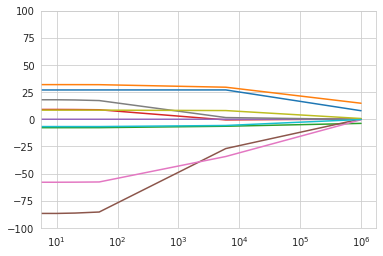

In [79]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_ylim(-100,100)
plt.show()

### **Lasso**
Lasso regression is a little bit different from Ridge regression. When lambda=0, the lasso regression is the same as the least squares line, when lambda increases, the slope gets smaller. Unlike RIdge regression, Lasso can exclude useless features from the model because it reduce variance.

In [80]:
errors=[]
coefs=[]
alphas=[-60, 0, 10, 20, 50, 6000, 1000000]
for alpha in alphas:
    linLasso = Lasso(alpha = alpha).fit(X_train, y_train)
    r2_train = linLasso.score(X_train, y_train)
    r2_test = linLasso.score(X_test, y_test)
    coefs.append(linLasso.coef_)
    errors.append(np.mean((linLasso.predict(X_test)-y_test)**2))
    print('Alpha = {:.2f}\n \
Lasso R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(alpha, r2_train, r2_test))

Alpha = -60.00
 Lasso R2 training: 0.37, R2 test: 0.33

Alpha = 0.00
 Lasso R2 training: 0.48, R2 test: 0.45

Alpha = 10.00
 Lasso R2 training: 0.48, R2 test: 0.45

Alpha = 20.00
 Lasso R2 training: 0.48, R2 test: 0.44

Alpha = 50.00
 Lasso R2 training: 0.47, R2 test: 0.44

Alpha = 6000.00
 Lasso R2 training: 0.04, R2 test: 0.03

Alpha = 1000000.00
 Lasso R2 training: 0.00, R2 test: -0.00



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2825624587.3396044, tolerance: 291980.0780629568
  positive)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 759771189.6724104, tolerance: 291980.0780629568
  positive)


*Grid Search on Lasso, we find the same result as the previous test*

In [81]:
lasso=Lasso()
#parameters={'alpha':[-10000,-6000,-100,-200, 1, 10, 20, 50,100,150,200, 600, 1000000]}
parameters={'alpha':list(range(-300,300))}

gridSearchLasso=GridSearchCV(lasso,parameters,scoring='r2',cv=4)
gridSearchLasso.fit(X_train,y_train)



best_Lasso=gridSearchLasso.best_estimator_
bestLasso_testScore=best_Lasso.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2132868462.0767288, tolerance: 213094.0083923897
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2210292036.533886, tolerance: 220031.18439297946
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2241309675.537841, tolerance: 222921.56858143077
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218703277

In [82]:
print('The best R2 train score is : {:.2f} with Alpha = {:.2f}\n \
'.format(gridSearchLasso.best_score_,gridSearchLasso.best_params_['alpha']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestLasso_testScore,gridSearchLasso.best_params_['alpha']))

The best R2 train score is : 0.48 with Alpha = 0.00
 
The best R2 test score is : 0.45
 with Alpha = 0.00
 


In [83]:
reporting['Lasso regression']=bestLasso_testScore

*We see all the coef when the alphas raise, our coeficients converge to 0*

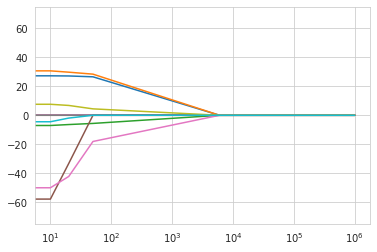

In [84]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_ylim(-75,75)
plt.show()

### **Decision Tree Regressor**
We first need to standartize data

In [87]:
scalerTrain = preprocessing.StandardScaler().fit(X_train)
scalerTest = preprocessing.StandardScaler().fit(X_test)
X_train_Scaled=scalerTrain.transform(X_train)
X_test_Scaled=scalerTest.transform(X_test)

In [88]:
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train_Scaled,y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test_Scaled,y_test)

In [89]:
print('The best Decision Tree R2 score is : {:.2f} with max depth = {:.2f} \n \
'.format(gridSearch_decisionTree.best_score_,gridSearch_decisionTree.best_params_['max_depth'] ))
print('The best R2 test score is : {:.2f}\n with max depth = {:.2f}\n \
'.format(bestDecisionTree_testScore,gridSearch_decisionTree.best_params_['max_depth']))

The best Decision Tree R2 score is : 0.72 with max depth = 8.00 
 
The best R2 test score is : 0.69
 with max depth = 8.00
 


**Present all the results of every model in a data frame and plot these in function of the model**

In [90]:
df_results=pd.DataFrame()
df_results['Model']=reporting.keys()
df_results['Score R2']=reporting.values()

In [91]:
df_results=df_results.set_index('Model')

In [92]:
dfVizModels=pd.DataFrame(df_results['Score R2'].sort_values(ascending=False))
dfVizModels.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Score R2
Model,
Linear regression,0.472812
Ridge regression,0.446820
Lasso regression,0.446692


**Polynomial Linear regression**

In [93]:
reporting['Decision Tree Regressor']=bestDecisionTree_testScore

In [94]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [95]:
create_polynomial_regression_model(3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 344.2311737725265
R2 score of training set is 0.7155923536651017


The model performance for the test set
-------------------------------------------
RMSE of test set is 378.3263049130731
R2 score of test set is 0.653698109642931


In [96]:
create_polynomial_regression_model(5)

The model performance for the training set
-------------------------------------------
RMSE of training set is 253.00583075499077
R2 score of training set is 0.8463608368929186


The model performance for the test set
-------------------------------------------
RMSE of test set is 10601.404352025502
R2 score of test set is -270.92465339989667


### **Random Forest Regressor**

In [97]:
import timeit
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, n_informative=2,
                        random_state=0, shuffle=False)

In [98]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

In [99]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [100]:
# Predicting the Test set results
y_pred = regr.predict(X_test)

In [101]:
import math
math.sqrt(mean_squared_error(y_test, y_pred))

302.3948529399759

In [102]:
r2_score(y_test, y_pred)

0.7787564724311862

In [103]:
# Validating Assumptions
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [104]:
from sklearn.metrics import mean_absolute_error
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [105]:
# Evaluation of training Data
print_metrics(y_train, y_train_pred)

MSE is 46035.72698534159
RMSE is 214.55937869350197
RMSE is 0.8895067167412323
MAE is 125.44378141934763
MAPE is inf


In [106]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 91442.64708458965
RMSE is 302.3948529399759
RMSE is 0.7787564724311862
MAE is 174.08961575602345
MAPE is inf
